<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/Lab02_part2_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing (1).csv to housing (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('housing (1).csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## **1. Perform the describe and info steps**

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## **2. Plot the histogram of each feature( Indicate what does histogram indicate on median_income and house_median_age)**

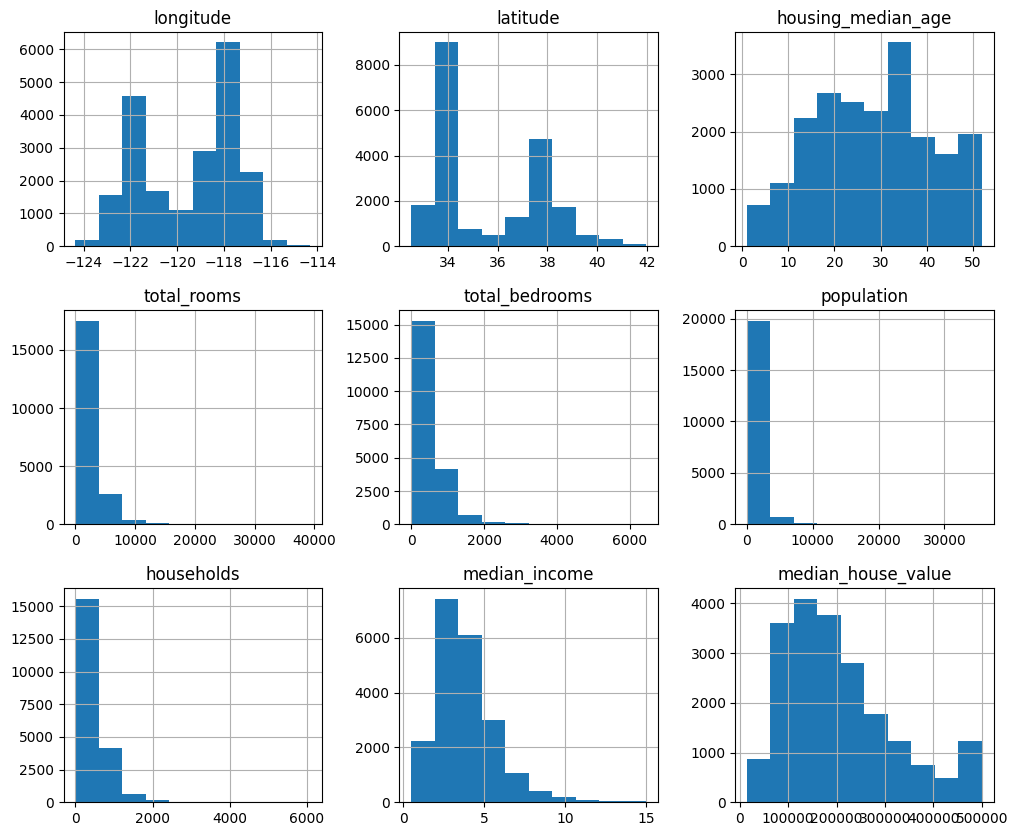

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.show()

## **3. Demonstrate the process of creating a test set( write the difference between random and stratified test set)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

bins = [0, 150000, 300000, 500000, 700000, 1000000, 10000000]
labels = [1, 2, 3, 4, 5, 6]
df['price_category'] = pd.cut(df['median_house_value'], bins=bins, labels=labels)

X = df.drop(['median_house_value', 'price_category'], axis=1)
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(y_train_strat.value_counts())
print(y_test_strat.value_counts())

price_category
2    7347
1    6096
3    2297
4     772
5       0
6       0
Name: count, dtype: int64
price_category
2    1837
1    1524
3     574
4     193
5       0
6       0
Name: count, dtype: int64


## **4. List the geographical features from the dataset and plot a graph to Visualize Geographical Data(what does the graph indicate w.r.t housing prices and location)**

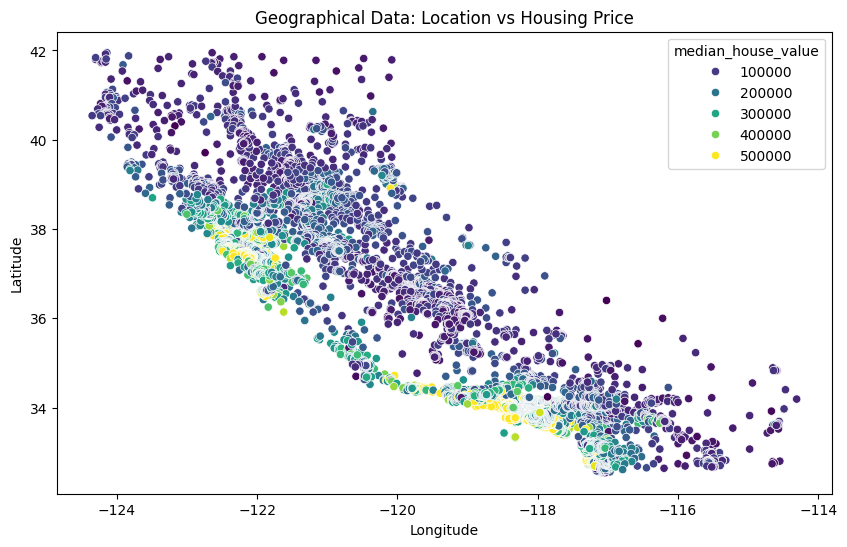

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'], palette='viridis')
plt.title("Geographical Data: Location vs Housing Price")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## **5. Plot a graph to show features correlation with housing price. Which feature corelates to the maximum. Plot the graph for that with housing price and analyze what the graph indicate**

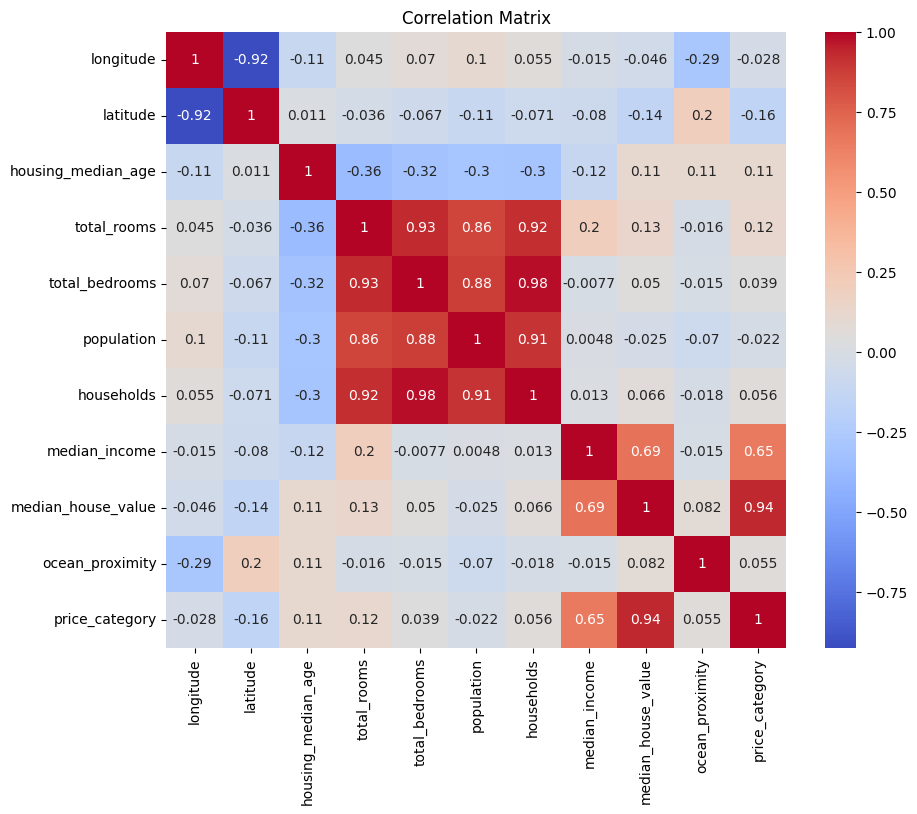

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## **6. List the features that could be combined to improve correlation and plot again to see if correlation has improved**

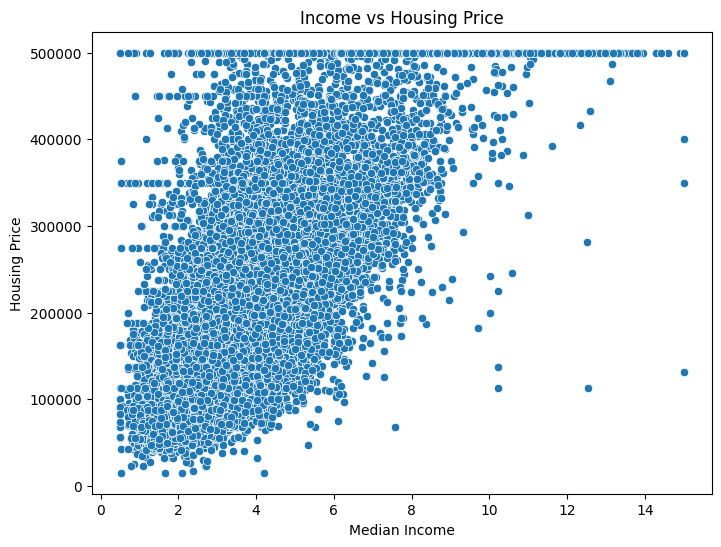

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title("Income vs Housing Price")
plt.xlabel('Median Income')
plt.ylabel('Housing Price')
plt.show()

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'price_category'],
      dtype='object')

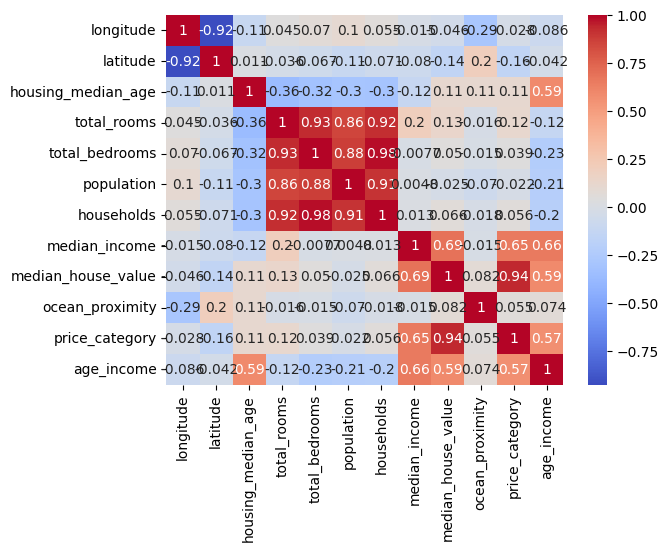

In [ ]:
df['age_income'] = df['housing_median_age'] * df['median_income']
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **7. List the features that needs to be cleaned and demonstrate the process of cleaning**

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

<ipython-input-67-419b582884fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


<ipython-input-69-543494168e98>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(numerical_cols.values, labels=numerical_cols.columns, vert=False)


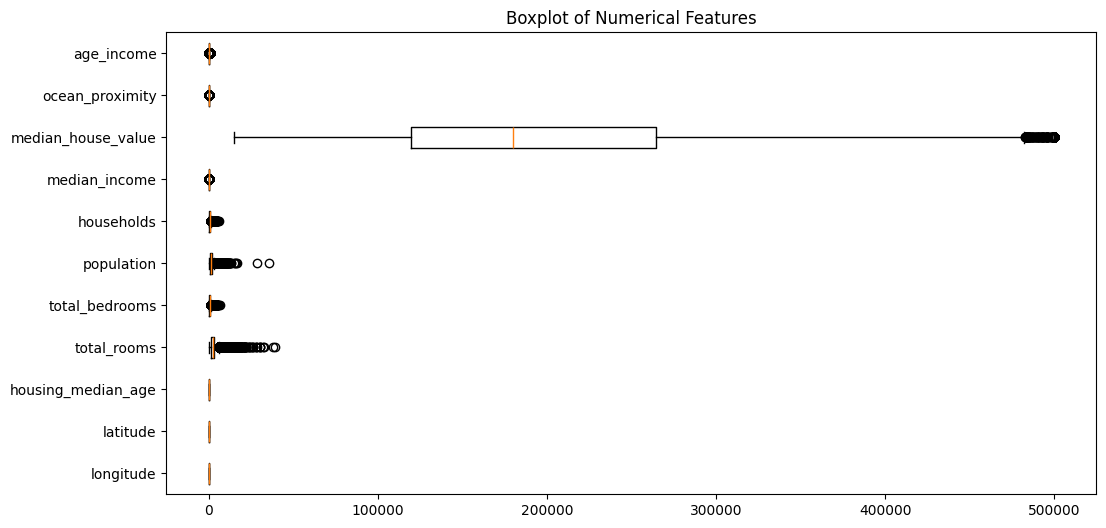

In [ ]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Create boxplots
plt.figure(figsize=(12, 6))
plt.boxplot(numerical_cols.values, labels=numerical_cols.columns, vert=False)
plt.title("Boxplot of Numerical Features")
plt.show()

In [ ]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((numerical_cols < lower_bound) | (numerical_cols > upper_bound)).any(axis=1)]

print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

Original Data Shape: (20640, 12)
Cleaned Data Shape: (13378, 12)


Original Data Shape: (20640, 12)
Cleaned Data Shape: (12145, 12)


<ipython-input-75-c578bb8c20f8>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_cleaned[numerical_cols.columns].values, labels=numerical_cols.columns, vert=False)


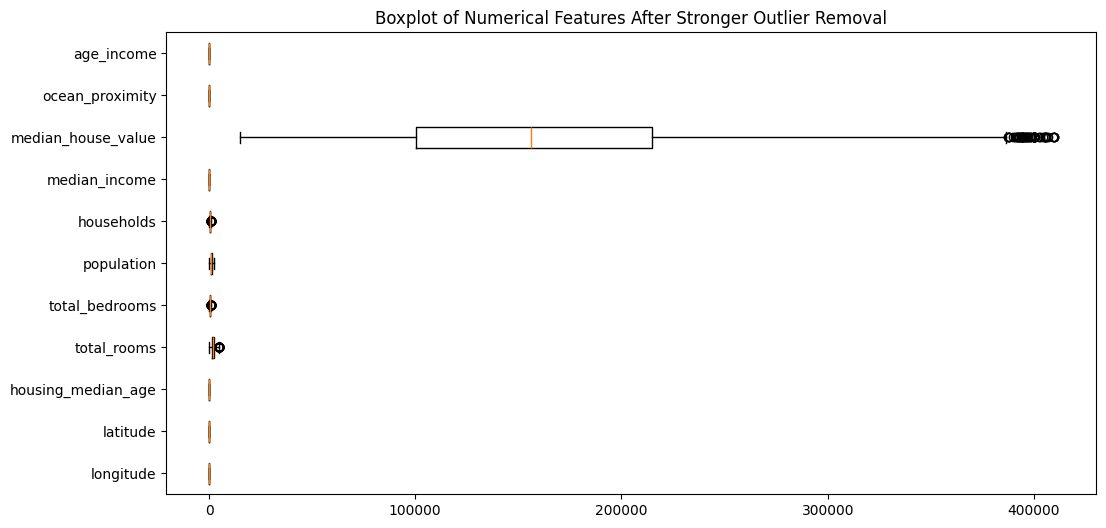

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select only numerical columns (exclude categorical)
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds (try using 1.0 * IQR instead of 1.5 * IQR)
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Find outlier rows
outlier_rows = (numerical_cols < lower_bound) | (numerical_cols > upper_bound)

# Remove rows with any outliers
df_cleaned = df.drop(df.index[np.where(outlier_rows.any(axis=1))], axis=0).copy()

# Print dataset shape before and after
print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

# Plot boxplots again to check the cleaned data
plt.figure(figsize=(12, 6))
plt.boxplot(df_cleaned[numerical_cols.columns].values, labels=numerical_cols.columns, vert=False)
plt.title("Boxplot of Numerical Features After Stronger Outlier Removal")
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_copy = df[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_encoder = cat_encoder.fit_transform(df_copy)

result = housing_cat_encoder.toarray()
print("Data:")
print(result)
category_list = cat_encoder.categories_
print("Category List::", category_list)

Data:
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Category List:: [array([0, 1, 2, 3, 4])]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy)
X_scaled

array([[ 1.2910888 ],
       [ 1.2910888 ],
       [ 1.2910888 ],
       ...,
       [-0.11673923],
       [-0.11673923],
       [-0.11673923]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CustomFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        age_income = X[:, 1] * X[:, 6]
        return np.c_[X, age_income]

num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                'population', 'households', 'median_income']
cat_features = ['ocean_proximity']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_adder', CustomFeatureAdder()),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_prepared = full_pipeline.fit_transform(df.drop('median_house_value', axis=1))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

final_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

final_pipeline.fit(X_train, y_train)

predictions = final_pipeline.predict(X_test)

print(predictions[:5])

[1.   1.02 3.51 2.15 2.04]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
y = df['median_house_value']
model.fit(X_prepared, y)

print("✅ Pipeline successfully transformed the data and fit a model!")

✅ Pipeline successfully transformed the data and fit a model!
